In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
in_path = Path('../data/raw')
out_path = Path('../data/interim')

In [4]:
df = pd.read_csv(in_path / 'properties_missing_imputed.csv')

In [5]:
df.shape

(5821, 19)

In [6]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,olive greens,gota,0.90,9317.0,3,3,1,3.0,East,Relatively New,1005.0,0,0,1,0,0,0,165
1,house,aamramanjari bunglows,south bopal,6.40,16048.0,5,5,2,1.0,East,Relatively New,3988.0,0,0,0,0,0,1,42
2,flat,avirat silver gardenia,gota,0.62,7607.0,2,2,1,2.0,East,Relatively New,1046.0,0,0,1,0,0,0,138
3,flat,preet residency,memnagar,0.85,5667.0,3,3,1,4.0,NaN,Old Property,1360.0,0,0,1,0,0,1,42
4,house,independent,south bopal,2.30,9536.0,3,3,1,1.0,NaN,Moderately Old,2412.0,0,0,1,0,0,0,17


In [7]:
train_df = df.drop(columns=['society','price_per_sqft','facing'])

In [8]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,gota,0.90,3,3,1,3.0,Relatively New,1005.0,0,0,1,0,0,0,165
1,house,south bopal,6.40,5,5,2,1.0,Relatively New,3988.0,0,0,0,0,0,1,42
2,flat,gota,0.62,2,2,1,2.0,Relatively New,1046.0,0,0,1,0,0,0,138
3,flat,memnagar,0.85,3,3,1,4.0,Old Property,1360.0,0,0,1,0,0,1,42
4,house,south bopal,2.30,3,3,1,1.0,Moderately Old,2412.0,0,0,1,0,0,0,17


### luxury score

<Axes: >

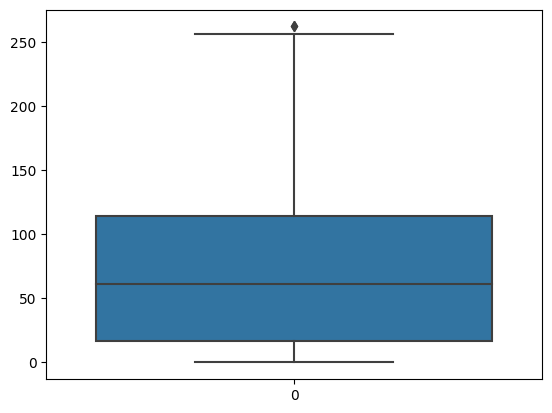

In [9]:
sns.boxplot(df['luxury_score'])

In [10]:
def categorize_luxury(score):
    if score == 0:
        return "Not available"
    elif 1 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    else :
        return "High"

In [11]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [12]:
train_df['luxury_score'].describe()

count    5821.000000
mean       73.948634
std        65.994282
min         0.000000
25%        17.000000
50%        61.000000
75%       114.000000
max       262.000000
Name: luxury_score, dtype: float64

In [13]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,gota,0.90,3,3,1,3.0,Relatively New,1005.0,0,0,1,0,0,0,165,High
1,house,south bopal,6.40,5,5,2,1.0,Relatively New,3988.0,0,0,0,0,0,1,42,Low
2,flat,gota,0.62,2,2,1,2.0,Relatively New,1046.0,0,0,1,0,0,0,138,Medium
3,flat,memnagar,0.85,3,3,1,4.0,Old Property,1360.0,0,0,1,0,0,1,42,Low
4,house,south bopal,2.30,3,3,1,1.0,Moderately Old,2412.0,0,0,1,0,0,0,17,Low


### floorNum

In [14]:
train_df['luxury_category'].isnull().sum()

0

<Axes: >

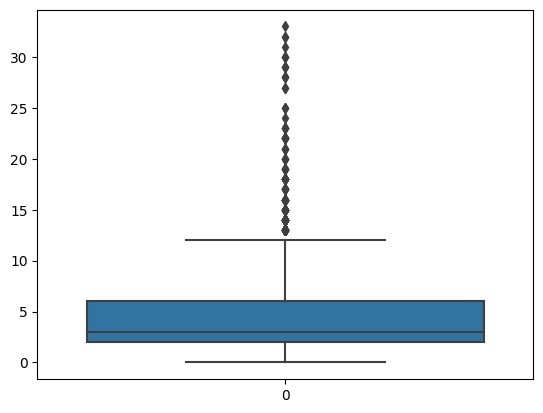

In [15]:
sns.boxplot(df['floorNum'])

In [16]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [17]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [18]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,gota,0.90,3,3,1,3.0,Relatively New,1005.0,0,0,1,0,0,0,165,High,Mid Floor
1,house,south bopal,6.40,5,5,2,1.0,Relatively New,3988.0,0,0,0,0,0,1,42,Low,Low Floor
2,flat,gota,0.62,2,2,1,2.0,Relatively New,1046.0,0,0,1,0,0,0,138,Medium,Low Floor
3,flat,memnagar,0.85,3,3,1,4.0,Old Property,1360.0,0,0,1,0,0,1,42,Low,Mid Floor
4,house,south bopal,2.30,3,3,1,1.0,Moderately Old,2412.0,0,0,1,0,0,0,17,Low,Low Floor


In [19]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [20]:
temp = train_df.drop(columns=['servant room', 'study room', 'others'])
temp['furnishing_type'] = temp['furnishing_type'].replace({0.0:'unfurnished',1.0:'semifurnished',2.0:'furnished'})
temp.to_csv(path + 'properties_post_feature_selection_v2.csv',index=False)

In [21]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,gota,0.90,3,3,1,Relatively New,1005.0,0,0,1,0,0,0,High,Mid Floor
1,house,south bopal,6.40,5,5,2,Relatively New,3988.0,0,0,0,0,0,1,Low,Low Floor
2,flat,gota,0.62,2,2,1,Relatively New,1046.0,0,0,1,0,0,0,Medium,Low Floor
3,flat,memnagar,0.85,3,3,1,Old Property,1360.0,0,0,1,0,0,1,Low,Mid Floor
4,house,south bopal,2.30,3,3,1,Moderately Old,2412.0,0,0,1,0,0,0,Low,Low Floor


In [22]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['bapunagar', 'bhadaj', 'bodakdev', 'chandkheda', 'chandlodia',
       'charodi', 'ctm', 'ghatlodia', 'ghuma', 'gota', 'gurukul',
       'isanpur', 'jagatpur', 'jodhpur', 'khokhara', 'koteshwar',
       'krishna nagar', 'maninagar', 'memnagar', 'motera', 'nana chiloda',
       'naranpura', 'naroda', 'narol', 'nava naroda', 'navrangpura',
       'new maninagar', 'new ranip', 'nikol', 'odhav', 'paldi',
       'prahlad nagar', 'sarkhej', 'satellite', 'science city',
       'sg highway', 'shahibaug', 'shela', 'shilaj', 'sola',
       'south bopal', 'thaltej', 'usmanpura', 'vaishnodevi circle',
       'vasna', 'vastral', 'vastrapur', 'vatva'], dtype=object)]
[array(['0', '1', '2', '3', '3+'], dtype=object)]
[array(['Moderately Old', 'New Property', 'Old Property', 'Relatively New',
       'Under Construction'], dtype=object)]
[array(['High', 'Low', 'Medium', 'Not available'], dtype=object)]
[array(['High Floor', 'Low Floor', 'Mid Floor'], dtyp

In [23]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,9.0,3,3,1.0,3.0,1005.0,0,0,1,0,0,0,0.0,2.0
1,1.0,40.0,5,5,2.0,3.0,3988.0,0,0,0,0,0,1,1.0,1.0
2,0.0,9.0,2,2,1.0,3.0,1046.0,0,0,1,0,0,0,2.0,1.0
3,0.0,18.0,3,3,1.0,2.0,1360.0,0,0,1,0,0,1,1.0,2.0
4,1.0,40.0,3,3,1.0,0.0,2412.0,0,0,1,0,0,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5816,1.0,47.0,2,1,1.0,0.0,756.0,0,0,0,0,0,0,3.0,1.0
5817,0.0,2.0,4,4,2.0,4.0,3349.0,1,1,1,1,0,0,2.0,2.0
5818,0.0,40.0,3,3,1.0,4.0,1452.0,0,0,0,0,0,0,2.0,2.0
5819,0.0,30.0,4,4,2.0,4.0,3150.0,0,0,1,0,0,0,2.0,2.0


In [24]:
y_label

0       0.90
1       6.40
2       0.62
3       0.85
4       2.30
        ... 
5816    0.45
5817    3.84
5818    0.75
5819    2.10
5820    2.35
Name: price, Length: 5821, dtype: float64

### Technique 1 - Correlation Analysis

<Axes: >

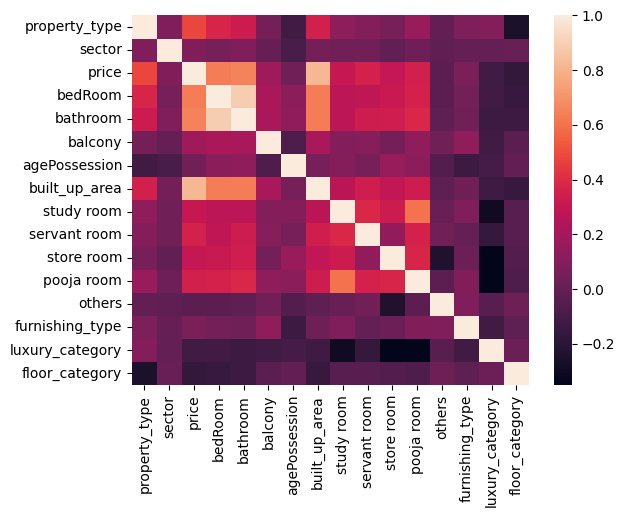

In [26]:
 sns.heatmap(data_label_encoded.corr())

In [27]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,0.091360
1,price,1.000000
2,bedRoom,0.631957
3,bathroom,0.646457
4,balcony,0.181250
5,agePossession,0.040901
6,built_up_area,0.817754
7,study room,0.304519
8,servant room,0.361137
9,store room,0.301782


### Technique 2 - Random Forest Feature Importance

In [158]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.766557
0,property_type,0.045805
1,sector,0.042931
3,bathroom,0.042411
2,bedRoom,0.032602
4,balcony,0.012168
5,agePossession,0.012018
12,furnishing_type,0.011145
9,store room,0.006970
13,luxury_category,0.006428


### Technique 3 - Gradient Boosting Feature importances

In [159]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.751403
3,bathroom,0.084864
2,bedRoom,0.058075
0,property_type,0.053512
1,sector,0.026872
5,agePossession,0.006806
12,furnishing_type,0.006610
9,store room,0.003928
11,others,0.002389
10,pooja room,0.001618


### Technique 4 - Permutation Importance

In [160]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.697413
0,property_type,0.130468
3,bathroom,0.064915
1,sector,0.058184
2,bedRoom,0.017847
5,agePossession,0.014335
13,luxury_category,0.008148
4,balcony,0.004699
12,furnishing_type,0.004054
14,floor_category,0.002635


### Technique 5 - LASSO

In [161]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5


,feature,lasso_coeff
6,built_up_area,0.642923
3,bathroom,0.476555
0,property_type,0.472843
8,servant room,0.207637
2,bedRoom,0.140239
9,store room,0.128888
7,study room,0.061778
12,furnishing_type,0.042414
1,sector,0.034392
4,balcony,0.033806


### Technique 6 - RFE

In [162]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6


,feature,rfe_score
6,built_up_area,0.760631
0,property_type,0.048436
1,sector,0.043440
3,bathroom,0.043294
2,bedRoom,0.032759
5,agePossession,0.012962
12,furnishing_type,0.012623
4,balcony,0.011394
9,store room,0.006938
10,pooja room,0.006260


### Technique 7 - Linear Regression Weights

In [163]:
# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7


,feature,reg_coeffs
6,built_up_area,0.646615
0,property_type,0.477556
3,bathroom,0.473027
8,servant room,0.213760
2,bedRoom,0.141701
9,store room,0.135013
7,study room,0.065732
12,furnishing_type,0.049317
1,sector,0.042990
4,balcony,0.041077


### Technique 8 - SHAP

In [164]:
!pip install shap

In [165]:
# import shap

# # Compute SHAP values using the trained Random Forest model
# rf = RandomForestRegressor(n_estimators=100, random_state=42)
# rf.fit(X_label, y_label)

# explainer = shap.TreeExplainer(rf)
# shap_values = explainer.shap_values(X_label)

# # Summing the absolute SHAP values across all samples to get an overall measure of feature importance
# shap_sum = np.abs(shap_values).mean(axis=0)

# shap_values


In [166]:
# fi_df8 = pd.DataFrame({
#     'feature': X_label.columns,
#     'SHAP_score': np.abs(shap_values).mean(axis=0)
# }).sort_values(by='SHAP_score', ascending=False)

# fi_df8

In [167]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').set_index('feature')

In [168]:
final_fi_df


,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs
feature,,,,,,,
sector,0.091074,0.042931,0.026872,0.058184,0.034392,0.043440,0.042990
bedRoom,0.630804,0.032602,0.058075,0.017847,0.140239,0.032759,0.141701
bathroom,0.645335,0.042411,0.084864,0.064915,0.476555,0.043294,0.473027
balcony,0.180838,0.012168,0.001545,0.004699,0.033806,0.011394,0.041077
agePossession,0.040469,0.012018,0.006806,0.014335,-0.000000,0.012962,-0.005930
built_up_area,0.621626,0.766557,0.751403,0.697413,0.642923,0.760631,0.646615
study room,0.303982,0.003097,0.000479,-0.002441,0.061778,0.003334,0.065732
servant room,0.360635,0.003563,0.001362,-0.002727,0.207637,0.003762,0.213760
store room,0.301134,0.006970,0.003928,-0.001398,0.128888,0.006938,0.135013


In [169]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [170]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.801088
bathroom           0.063698
sector             0.046606
bedRoom            0.037656
agePossession      0.012502
furnishing_type    0.009156
balcony            0.007950
luxury_category    0.005792
store room         0.004282
floor_category     0.003740
pooja room         0.002939
others             0.001991
servant room       0.001492
study room         0.001107
dtype: float64

In [171]:
# to drop pooja room, study room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,9.0,3.0,3.0,1.0,3.0,1005.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
1,1.0,40.0,5.0,5.0,2.0,3.0,3988.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,0.0,9.0,2.0,2.0,1.0,3.0,1068.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0
3,0.0,18.0,3.0,3.0,1.0,2.0,1373.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0
4,1.0,40.0,3.0,3.0,1.0,0.0,2412.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5765,1.0,47.0,2.0,1.0,1.0,0.0,756.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5766,0.0,2.0,4.0,4.0,2.0,4.0,3429.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,2.0
5767,0.0,40.0,3.0,3.0,1.0,4.0,1584.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
5768,0.0,30.0,4.0,4.0,2.0,4.0,3150.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0


In [172]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [173]:
scores.mean()

0.8264214594991455

In [174]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['servant room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [175]:
scores.mean()

0.8287130571618665

In [25]:
export_df = X_label.drop(columns=['servant room', 'study room', 'others'])
export_df['price'] = y_label

In [26]:
export_df.to_csv(out_path / 'properties_post_feature_selection.csv', index=False)

In [27]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,store room,pooja room,furnishing_type,luxury_category,floor_category,price
0,0.0,9.0,3,3,1.0,3.0,1005.0,1,0,0,0.0,2.0,0.90
1,1.0,40.0,5,5,2.0,3.0,3988.0,0,0,1,1.0,1.0,6.40
2,0.0,9.0,2,2,1.0,3.0,1068.0,1,0,0,2.0,1.0,0.62
3,0.0,18.0,3,3,1.0,2.0,1373.0,1,0,1,1.0,2.0,0.85
4,1.0,40.0,3,3,1.0,0.0,2412.0,1,0,0,1.0,1.0,2.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5821,1.0,47.0,2,1,1.0,0.0,756.0,0,0,0,3.0,1.0,0.45
5822,0.0,2.0,4,4,2.0,4.0,3429.0,1,1,0,2.0,2.0,3.84
5823,0.0,40.0,3,3,1.0,4.0,1584.0,0,0,0,2.0,2.0,0.75
5824,0.0,30.0,4,4,2.0,4.0,3150.0,1,0,0,2.0,2.0,2.10
